In [56]:
%run packed_bubbles.ipynb

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import os

In [58]:
with open("badwords.txt") as text:
    words = text.readlines()
    words = [w.strip(" \n") for w in words]

In [59]:
words

['ass',
 'asses',
 'asshead',
 'asshole',
 'assholes',
 'bastard',
 'bastards',
 'bitch',
 'bitches',
 'bullshit',
 'chickenshit',
 'cockblockery',
 'cocksucker',
 'cunt',
 'cunts',
 'damn',
 'damned',
 'dick',
 'dickless',
 'dicks',
 'dumbass',
 'faggot',
 'fuck',
 'fucked',
 'fucker',
 'fuckers',
 'fuckface',
 'fuckhead',
 'fucking',
 'fucks',
 'fuckup',
 'goddamn',
 'goddamned',
 'gook',
 'gooks',
 'hell',
 'horeshit',
 'horseshit',
 'jackass',
 'jap',
 'japs',
 'jew',
 'merde',
 'motherfucker',
 'motherfuckers',
 'motherfucking',
 'n-word',
 'negro',
 'pussy',
 'shit',
 'shithead',
 'shitless',
 'shitload',
 'shittiest',
 'shitting',
 'shitty',
 'slope',
 'slut',
 'squaw',
 'wetback',
 'weed']

In [60]:
def words_counter(archive, words=words):
    """
    Function that count the bad words from subtitles and then creates a DataFrame.
    """
    
    head, tail = os.path.split(archive)
    film = tail.rstrip('.str')
    
    df = {'word': [], 'quantity': []} 
    with open(archive, encoding='cp1252') as film_subs:
        lines = film_subs.readlines()
        lines = [i.replace('\n', '') for i in lines if i[:-1]]
        for word in words:   
            word_for_search = list(word)
            word_for_search[-1] = '.'
            word_for_search = ''.join(word_for_search)
            counter = 0
            for line in lines:
                if re.findall(word_for_search, line):
                    counter += len(re.findall(word_for_search, line))
            df['quantity'].append(counter)
            df['word'].append(word)
    df = pd.DataFrame(df)
    df['film'] = film
    
    return df

In [61]:
def bad_words(dataset):
    """
    Function that creates a BubbleChart based in DataFrame of badwords
    """
    
    film = dataset['film'][0]
    quantity = dataset[dataset['quantity']>0].quantity.tolist()
    wrds = dataset[dataset['quantity']>0].word.tolist()
    wrds = [x.upper() for x in wrds]
    colors_build = list(sns.color_palette('flare', n_colors = len(wrds), desat = 0.75))
    
    bubble_chart = BubbleChart(quantity, bubble_spacing=0.1)

    bubble_chart.collapse()

    fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize = (20, 30))
    bubble_chart.plot(ax, wrds, colors_build)
    ax.axis("off")
    ax.relim()
    ax.autoscale_view()
    ax.set_title('{} Bad Words Bubble Chart'.format(film))
    

    plt.show()

References:
1 - BASTARD
2 - BASTARDS
3 - BITCHES
4 - COCKSUCKER
5 - CUNT
6 - CUNTS
7 - DICKS
8 - FUCKED
9 - FUCKER
10 - FUCKERS
11 - MOTHERFUCKING
12 - SHITHEAD
13 - SQUAW
14 - WEED



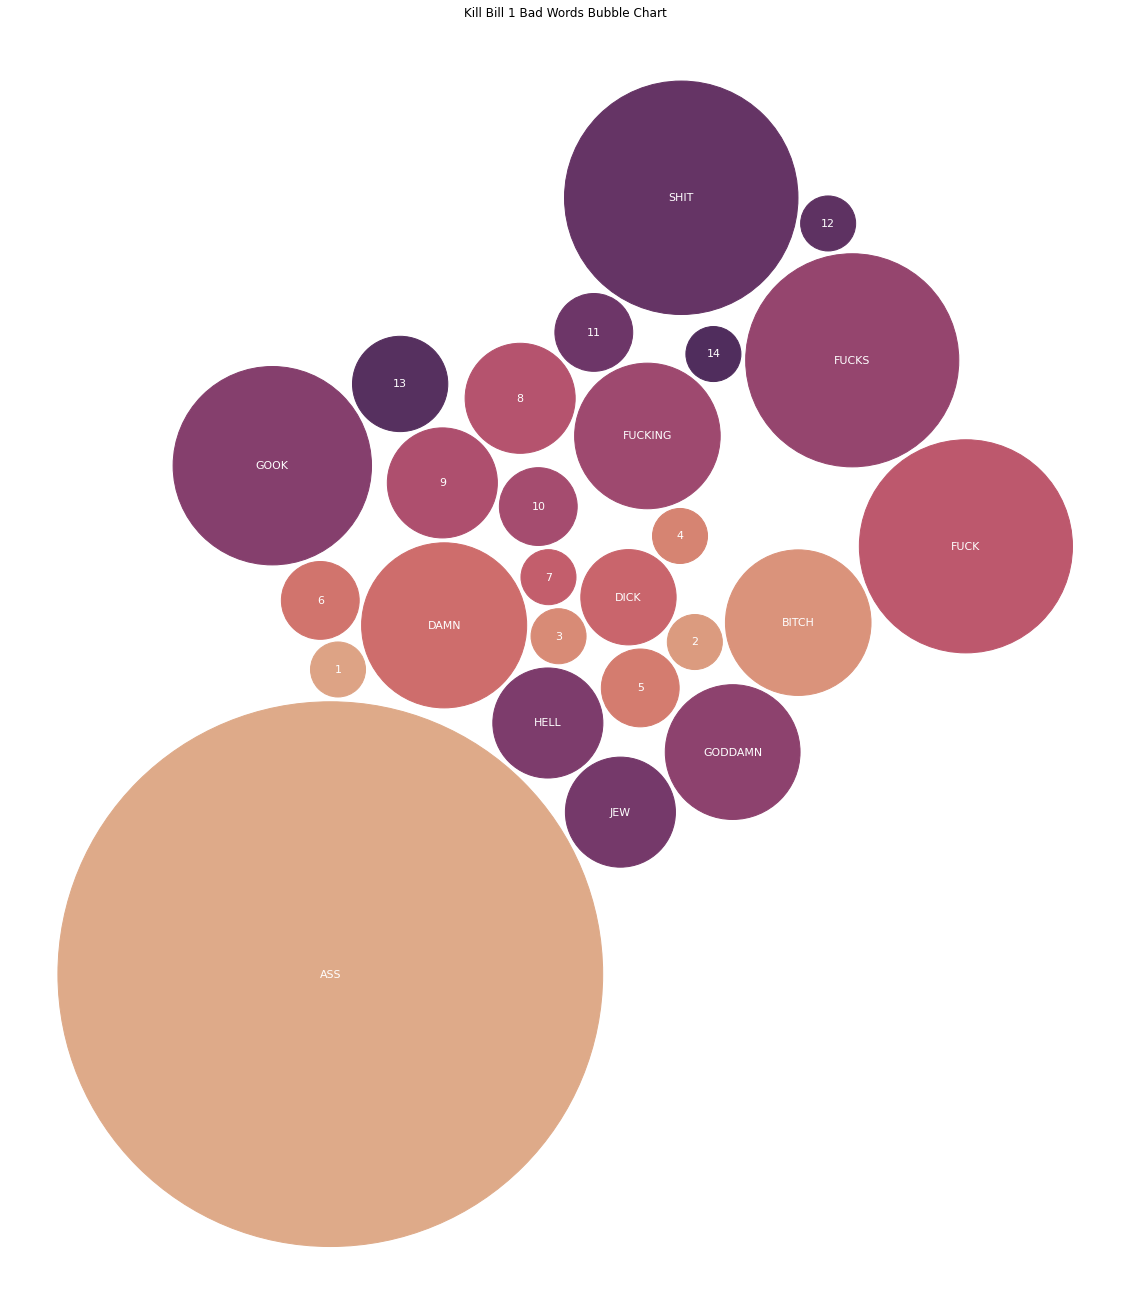

In [62]:
bad_words(words_counter('./subtitles/Kill Bill 1.srt'))